<a href="https://colab.research.google.com/github/jazzathoth/DS-Unit-1-Sprint-1-Dealing-With-Data/blob/master/DS3_Unit_1_Sprint_Challenge_3_Data_Storytelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science Unit 1 Sprint Challenge 3

# Data Storytelling

In this sprint challenge you'll work with a dataset from **FiveThirtyEight's article, [Every Guest Jon Stewart Ever Had On ‘The Daily Show’](https://fivethirtyeight.com/features/every-guest-jon-stewart-ever-had-on-the-daily-show/)**!

# Part 0 — Run this starter code

You don't need to add or change anything here. Just run this cell and it loads the data for you, into a dataframe named `df`.

(You can explore the data if you want, but it's not required to pass the Sprint Challenge.)

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

url = 'https://raw.githubusercontent.com/fivethirtyeight/data/master/daily-show-guests/daily_show_guests.csv'
df = pd.read_csv(url).rename(columns={'YEAR': 'Year', 'Raw_Guest_List': 'Guest'})

def get_occupation(group):
    if group in ['Acting', 'Comedy', 'Musician']:
        return 'Acting, Comedy & Music'
    elif group in ['Media', 'media']:
        return 'Media'
    elif group in ['Government', 'Politician', 'Political Aide']:
        return 'Government and Politics'
    else:
        return 'Other'
      
df['Occupation'] = df['Group'].apply(get_occupation)

In [2]:
df.shape

(2693, 6)

In [3]:
df.head()

,Year,GoogleKnowlege_Occupation,Show,Group,Guest,Occupation
0,1999,actor,1/11/99,Acting,Michael J. Fox,"Acting, Comedy & Music"
1,1999,Comedian,1/12/99,Comedy,Sandra Bernhard,"Acting, Comedy & Music"
2,1999,television actress,1/13/99,Acting,Tracey Ullman,"Acting, Comedy & Music"
3,1999,film actress,1/14/99,Acting,Gillian Anderson,"Acting, Comedy & Music"
4,1999,actor,1/18/99,Acting,David Alan Grier,"Acting, Comedy & Music"


# Part 1 — What's the breakdown of guests’ occupations per year?

For example, in 1999, what percentage of guests were actors, comedians, or musicians? What percentage were in the media? What percentage were in politics? What percentage were from another occupation?

Then, what about in 2000? In 2001? And so on, up through 2015.

So, **for each year of _The Daily Show_, calculate the percentage of guests from each occupation:**
- Acting, Comedy & Music
- Government and Politics
- Media
- Other

#### Hints:
You can make a crosstab. (See pandas documentation for examples, explanation, and parameters.)

You'll know you've calculated correctly when the percentage of "Acting, Comedy & Music" guests is 90.36% in 1999, and 45% in 2015.

**Optional Bonus Challenge:** Do additional insightful data exploration.

In [0]:
# Make a crosstab of Year and occupation category of guests, 
# then normalize by row(year)
daily_ct = pd.crosstab(index=df['Year'], 
                       columns=df['Occupation'], 
                       normalize='index')

In [5]:
daily_ct

Occupation,"Acting, Comedy & Music",Government and Politics,Media,Other
Year,,,,
1999,0.903614,0.012048,0.066265,0.018072
2000,0.739645,0.082840,0.124260,0.053254
2001,0.726115,0.038217,0.197452,0.038217
2002,0.622642,0.069182,0.264151,0.044025
2003,0.560241,0.102410,0.246988,0.090361
2004,0.384146,0.225610,0.274390,0.115854
2005,0.370370,0.160494,0.333333,0.135802
2006,0.360248,0.192547,0.291925,0.155280
2007,0.255319,0.170213,0.333333,0.241135


# Part 2 — Recreate this explanatory visualization:

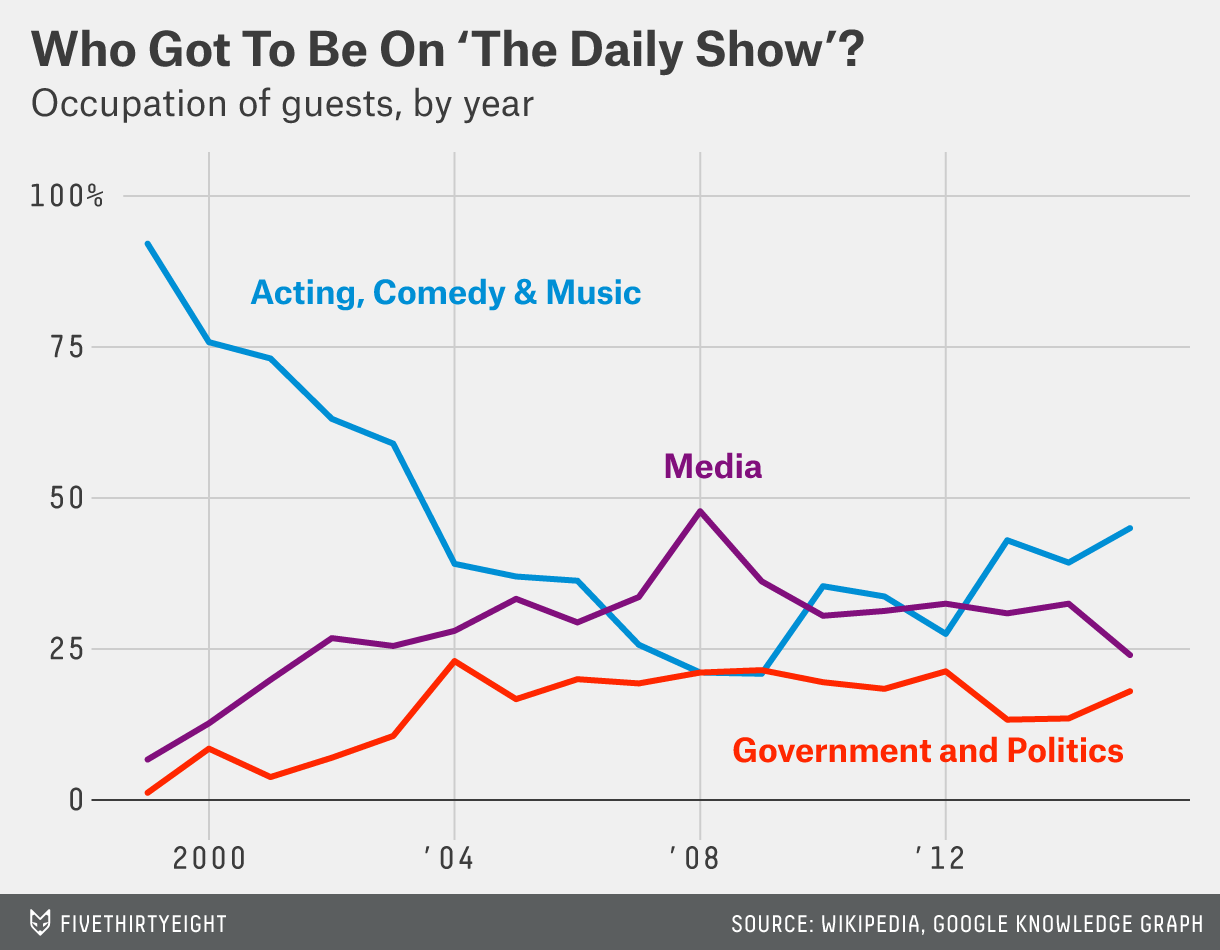

In [6]:
from IPython.display import display, Image
png = 'https://fivethirtyeight.com/wp-content/uploads/2015/08/hickey-datalab-dailyshow.png'
example = Image(png, width=500)
display(example)

In [0]:
daily_ct = daily_ct.drop('Other', axis=1)

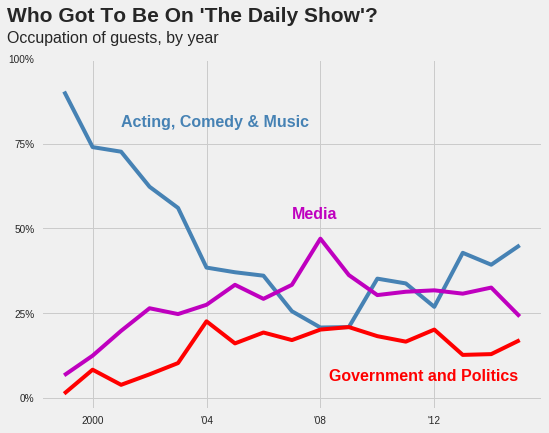

In [57]:
plt.style.use('fivethirtyeight')

# calling figure and setting up axis as single subplot
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)

# plot all 3 lines seperately so I have controll over color
plt.plot(daily_ct['Acting, Comedy & Music'], c='steelblue')
plt.plot(daily_ct['Government and Politics'], c='r')
plt.plot(daily_ct['Media'], c='m')

# setting lables, ranges
ax.set(yticks=[0,.25,.5,.75,1], xticks=[2000,2004,2008,2012])
yval = ax.get_yticks()
ax.set_yticklabels(['{:,.0%}'.format(x) for x in yval])# I like this better, more
                                                       # identical version below
ax.set_xticklabels(["2000","'04","'08","'12"])

# Make margins tighter
ax.margins(tight=True)

# Add title
ax.text(1997, 1.11, 
        s="Who Got To Be On 'The Daily Show'?", 
        ontsize=21, 
        fontweight='bold')
ax.text(1997, 1.05, 
        s="Occupation of guests, by year",
        fontsize=16)

# Add legend lables
ax.text(2001, .8, 
        s="Acting, Comedy & Music", 
        fontweight='bold',
        color='steelblue', 
        fontsize=16)
ax.text(2007, .53, 
        s="Media", 
        fontweight='bold', 
        color='m', 
        fontsize=16)
ax.text(2008.3, .05, 
        s="Government and Politics", 
        fontweight='bold', color='r', 
        fontsize=16);


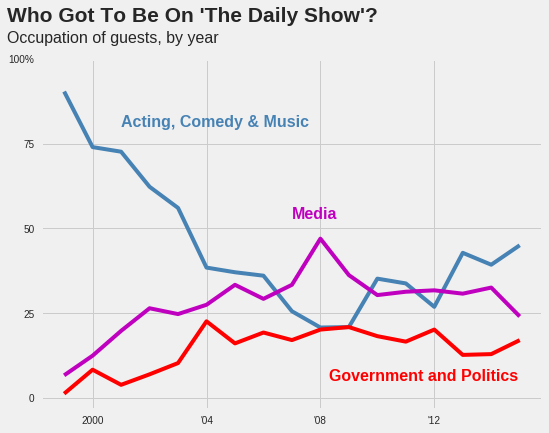

In [56]:
plt.style.use('fivethirtyeight')

# calling figure and setting up axis as single subplot
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)

# plot all 3 lines seperately so I have controll over color
plt.plot(daily_ct['Acting, Comedy & Music'], c='steelblue')
plt.plot(daily_ct['Government and Politics'], c='r')
plt.plot(daily_ct['Media'], c='m')

# setting lables, ranges
ax.set(yticks=[0,.25,.5,.75,1], 
       xticks=[2000,2004,2008,2012])

ax.set_yticklabels(["0","25","50","75","100%"]) #string lables to match 538
ax.set_xticklabels(["2000","'04","'08","'12"])

# Make margins tighter
ax.margins(tight=True)

# Add title
ax.text(1997, 1.11, 
        s="Who Got To Be On 'The Daily Show'?", 
        fontsize=21, 
        fontweight='bold')
ax.text(1997, 1.05, 
        s="Occupation of guests, by year",
        fontsize=16)

# Add legend lables
ax.text(2001, .8, 
        s="Acting, Comedy & Music", 
        fontweight='bold', 
        color='steelblue', 
        fontsize=16)
ax.text(2007, .53, 
        s="Media", 
        fontweight='bold', 
        color='m', 
        fontsize=16)
ax.text(2008.3, .05, 
        s="Government and Politics", 
        fontweight='bold', 
        color='r', 
        fontsize=16);

**Hints:**
- You can choose any Python visualization library you want. I've verified the plot can be reproduced with matplotlib, pandas plot, or seaborn. I assume other libraries like altair or plotly would work too.
- If you choose to use seaborn, you may want to upgrade the version to 0.9.0.

**Expectations:** Your plot should include:
- 3 lines visualizing "occupation of guests, by year." The shapes of the lines should look roughly identical to 538's example. Each line should be a different color. (But you don't need to use the _same_ colors as 538.)
- Legend or labels for the lines. (But you don't need each label positioned next to its line or colored like 538.)
- Title in the upper left: _"Who Got To Be On 'The Daily Show'?"_ with more visual emphasis than the subtitle. (Bolder and/or larger font.)
- Subtitle underneath the title: _"Occupation of guests, by year"_

**Optional Bonus Challenge:**
- Give your plot polished aesthetics, with improved resemblance to the 538 example.
- Any visual element not specifically mentioned in the expectations is an optional bonus.

# Part 3 — Who were the top 10 guests on _The Daily Show_?

**Make a plot** that shows their names and number of appearances.

**Add a title** of your choice.

**Expectations:** It's ok to make a simple, quick plot: exploratory, instead of explanatory. 

**Optional Bonus Challenge:** You can change aesthetics and add more annotation. For example, in a relevant location, could you add the text "19" to show that Fareed Zakaria appeared 19 times on _The Daily Show_? (And so on, for each of the top 10 guests.)

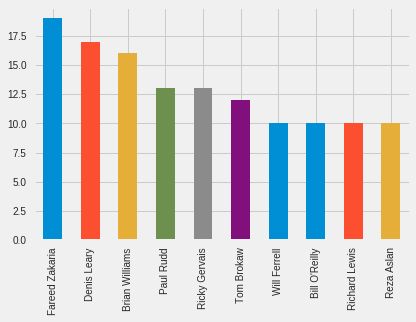

In [59]:
(df['Guest']                       # Get guest names, count reps, sort, grab 
    .value_counts(ascending=False) # 10, plot.
    .head(10)
    .plot(kind='bar'));